In [1]:
import numpy as np
#from numpy import genfromtxt
from matplotlib import pyplot as plt
import pandas as pd
import time
import random
import math

Extracting the data from csv file

In [2]:
data = np.genfromtxt('A2Data_train.csv', delimiter=',')
data_test=np.genfromtxt('A2Data_test.csv',delimiter=',')

In [3]:
features=data[:,:100]
lables=data[:,100].reshape(10000,1)
features_test=data_test[:,:100]
lables_test=data_test[:,100].reshape(500,1)

In [4]:
features.shape,lables.shape
X=features.T
Y=lables
X_test=features_test.T
Y_test=lables_test

In [5]:
X.shape

(100, 10000)

In [6]:
X_test.shape,Y_test.shape

((100, 500), (500, 1))

X is the train data<br>
Y is the train lables<br>
X_test is the test data<br>
Y_test is the test lables<br>

Rows of data matrix correspond to each data point, 10000 data points <br>
Columns of each row corresponds to features, 100 features per data point<br>

<br>
<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

QUESTION 1 
<br>
<br>
i. Obtain the least squares solution $w_{ML}$ to the regression problem using the closed
form expression.
<br>


$W_{ML}=(XX^T)^{-1}XY$
<br>
COMMENT 1: SHOULD THE DATA BE MEAN CENTRIC, because we are not considering constant terms, like c in y=mx+c

In [7]:
def find_W_ML(X,Y):
    '''
    X -> input
    Y -> output
    
    returns the maximum likihood W value W_ML
    '''
    XXt=np.matmul(X,X.T)
    inv_XXt=np.linalg.inv(XXt)
    XY=np.matmul(X,Y)
    W_ML=np.matmul(inv_XXt,XY)
    return W_ML

In [8]:
W_ML=find_W_ML(X,Y)

In [9]:
#calculating the mean square error on test data using W_ML weights trained from training data.

Y_fit=np.matmul(X_test.T,W_ML)
error=sum(sum((Y_test-Y_fit)**2)/Y_test.shape[0])
print(r"The mean square error on test data for W_ML =",error)

The mean square error on test data for W_ML = 0.37072731116978697


In [10]:
Yi=np.matmul(X.T,W_ML)
error=sum(sum((Y-Yi)**2)/Y.shape[0])
print(r"The mean square error on training data for W_ML =",error)

The mean square error on training data for W_ML = 0.039686441862725165


.

ii. Code the gradient descent algorithm with suitable step size to solve the least
squares algorithms and plot $||w^t−w_{ML}||$ as a function of t. What do you observe?

In [11]:
def error(Y,W,X):
    '''
    X-> Input data
    Y-> Lables
    W-> Learned weights
    
    Returns the error between Predicted lables and the actual lables
    '''
    er=np.matmul(X.T,W)
    ans=sum((Y-er)**2)/Y.shape[0]
    return ans

def derivative(X,W,Y):
    '''
    returns the derivative of objective function (mean square error here)
    Size of the returened matrix is same as W
    '''
    XXt=np.matmul(X,X.T)
    xy=np.matmul(X,Y)
    return 2*(np.matmul(XXt,W)-xy)

In [12]:
#Run the gradiesnt descent algorithm on train data untill convergance. 

#Initialize W, step_size
start=time.time()
W=np.random.rand(100,1)

#error_store stores the error calclulated at each iteration, this can be used to make plots
error_store=np.array([1e7])

#er_wml stores ||W-W_ML|| vs iteration used in plots
er_wml_w=np.array([1])

#tolerance is used for convergance. 
#after ith iteration change in error value is less than tolerance then stop iterations
tolerance=0.000005
verify=10

#counts the number of iterations
count=0

while(verify>tolerance):
    count=count+1
    step_size=0.000001
    W=W-step_size*derivative(X,W,Y)
    error_store=np.hstack((error_store,error(Y,W,X)))
    er_wml_w=np.hstack((er_wml_w,sum(abs(W-W_ML))))
    verify=abs((error_store[count-1]-error_store[count])/error_store[count-1])
end=time.time()
print("Time taken for ",count," iterations is ",end-start)

Time taken for  2938  iterations is  36.38493347167969


Number of iteration= 2938


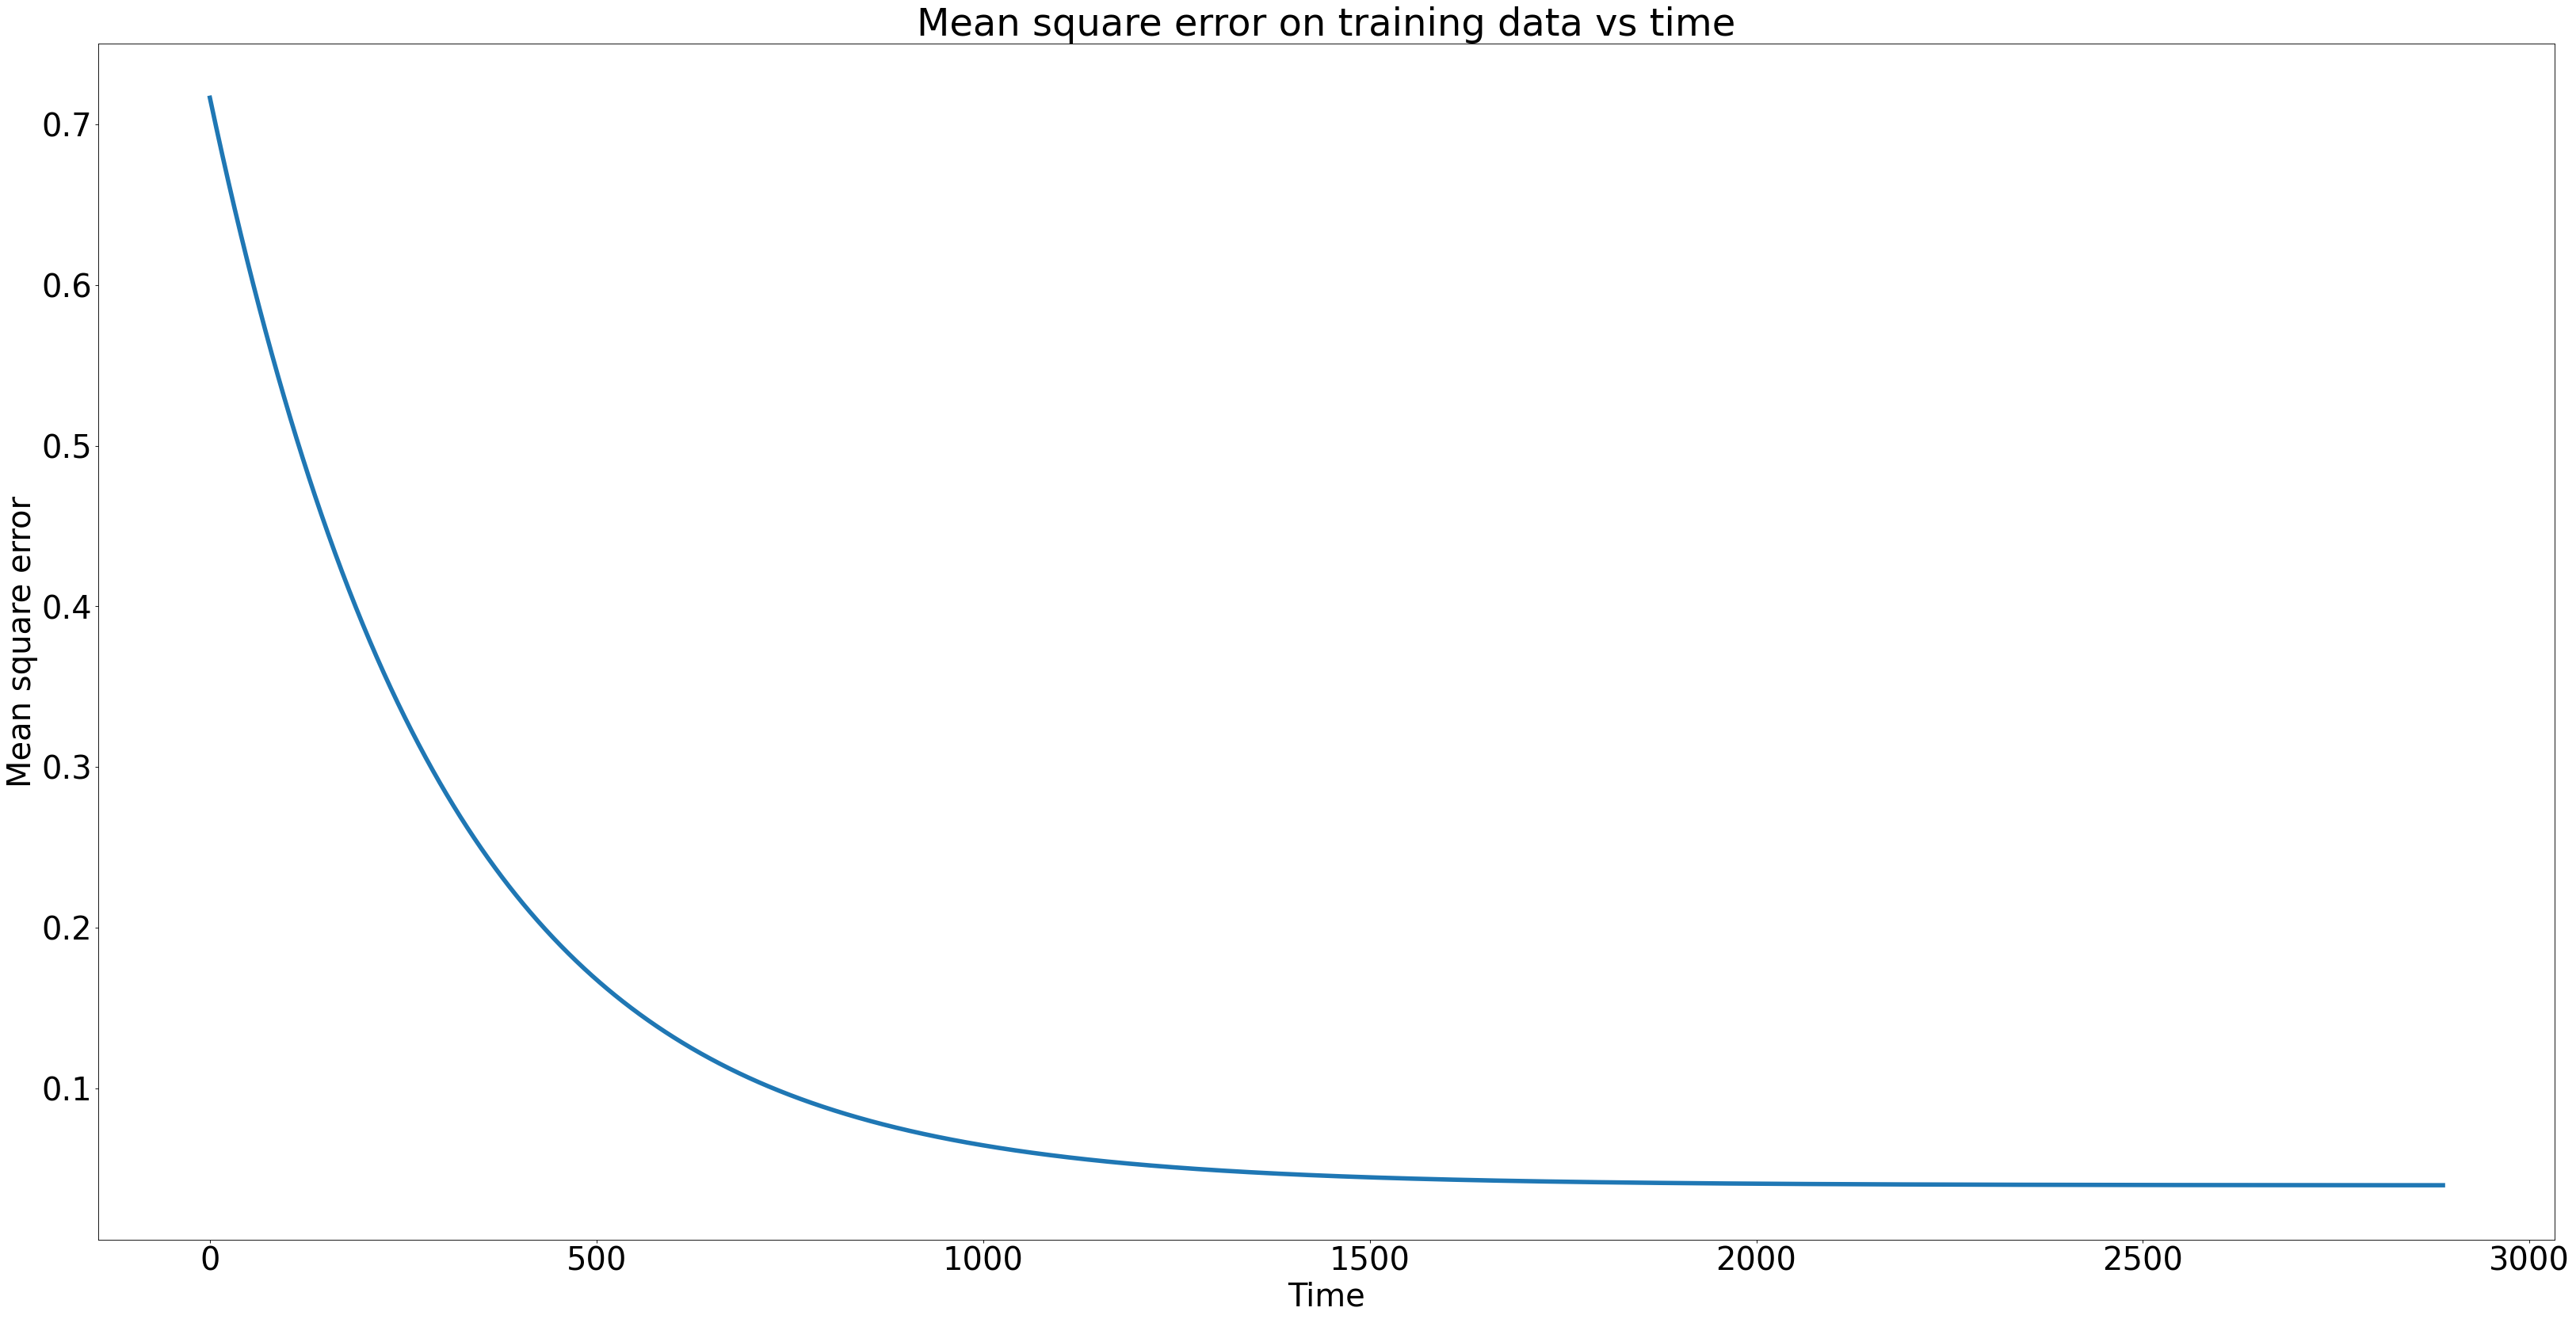

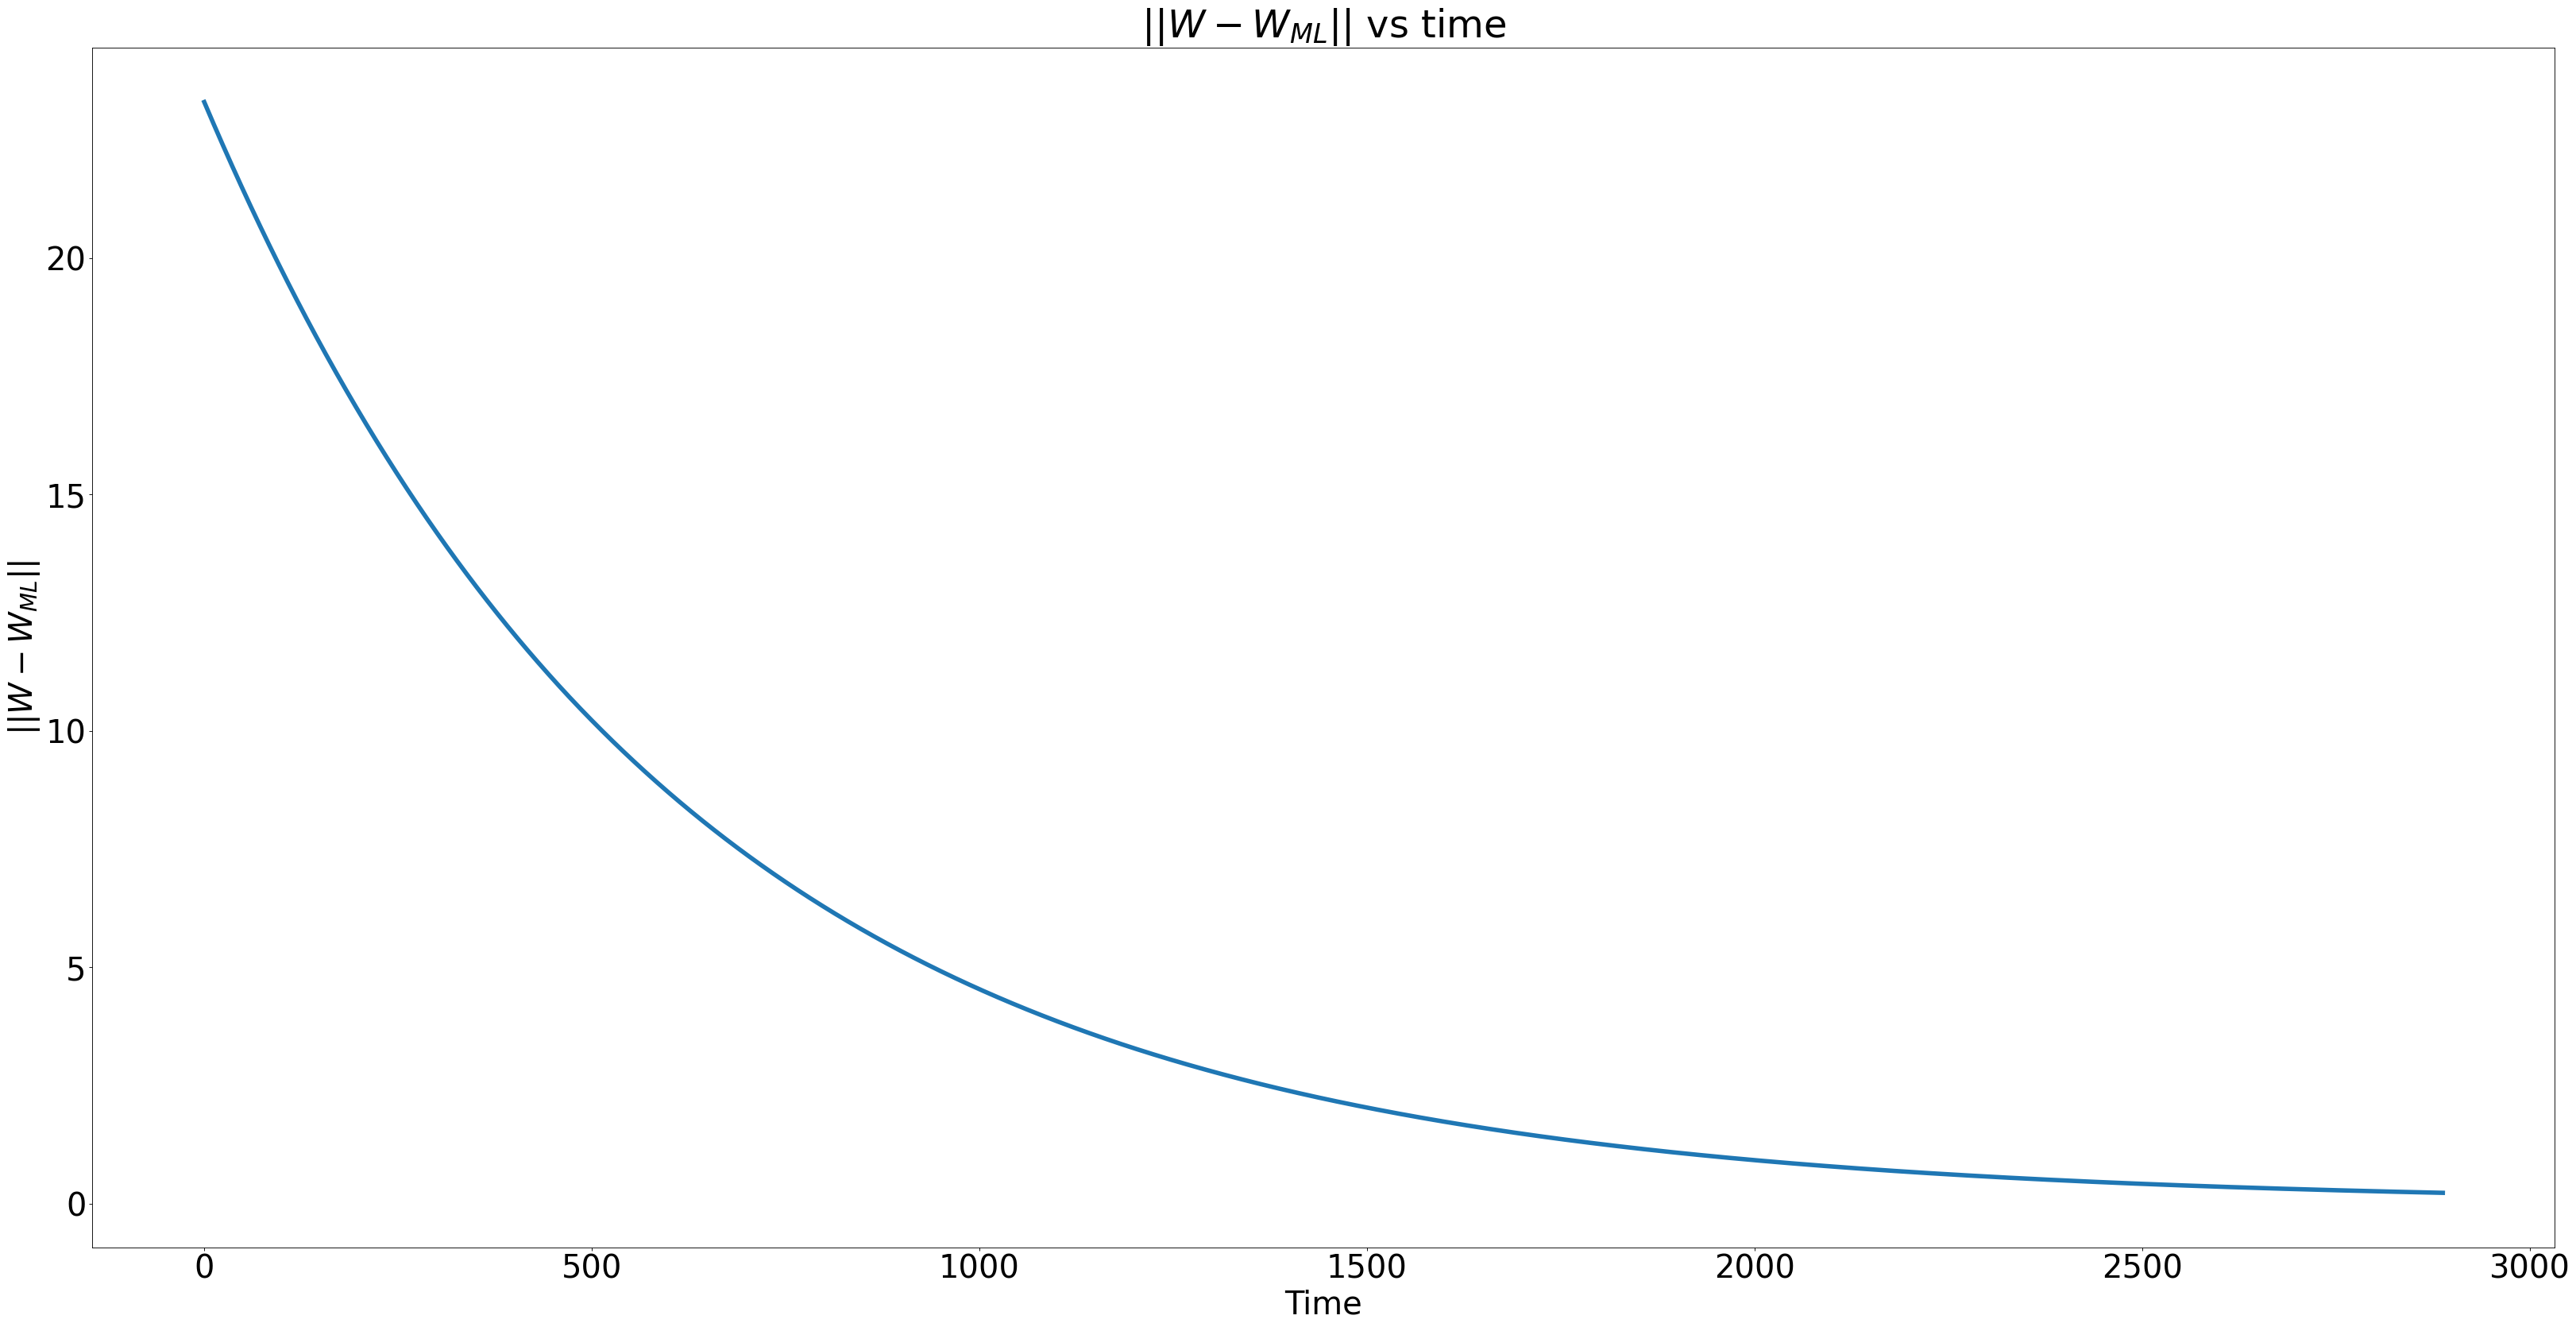

Mean square error on test data converges to:  0.03975100939366477


In [13]:
#plots different graphs to evaluate model performance
plt.rcParams.update({'font.size': 36})
plt.figure(figsize=(50, 25), dpi=80)
print("Number of iteration=",count)
plt.plot(error_store[50:],linewidth=5)
plt.title("Mean square error on training data vs time")
plt.ylabel("Mean square error")
plt.xlabel("Time")
plt.show()
plt.rcParams.update({'font.size': 36})
plt.figure(figsize=(50, 25), dpi=80)
plt.plot(er_wml_w[50:],linewidth=5)
plt.title("$||W-W_{ML}||$ vs time")
plt.xlabel("Time")
plt.ylabel("$||W-W_{ML}||$")
plt.show()
print("Mean square error on test data converges to: ",error_store[count-1])

In [14]:
#calculating the mean square error on test data using W weights trained using gradient descent algorithm on training data
Y_fit=np.matmul(X_test.T,W)
error=sum(sum((Y_test-Y_fit)**2)/Y_test.shape[0])
print(r"The mean square error on test data for W_ML =",error)

The mean square error on test data for W_ML = 0.36676779478577737


iii. Code the stochastic gradient descent algorithm using batch size of 100 and plot
$||w^t−w_{ML}||$ as a function of t. What are your observations?


In [15]:
def split_batches(X,Y,n=100):
    '''Given data splits the given data set into batches of size n
    and returns X as 100x100x100 Y as 100X100X1'''
    indexes=np.linspace(0,9999,10000,dtype=int)
    np.random.shuffle(indexes)
    n2=int(X.shape[1]/n)
    n3=int(Y.shape[0]/n)
    
    X_r=np.zeros((n,X.shape[0],n2))
    Y_r=np.zeros((n,n3,1))
    for i in range(0,100):
        X_r[i]=X[:,indexes[i*100:100*(i+1)]]
        Y_r[i]=Y[indexes[i*100:100*(i+1)],0].reshape(100,1)
    return X_r,Y_r
def error(Y,W,X):
    '''
    X-> Input data
    Y-> Lables
    W-> Learned weights
    
    Returns the error between Predicted lables and the actual lables
    '''
    er=np.matmul(X.T,W)
    ans=sum((Y-er)**2)/Y.shape[0]
    return ans

In [16]:
del error_store
start=time.time()
X_rand,Y_rand=split_batches(X,Y)
W=np.random.rand(100,1)
error_store=np.array([1e7])
er_wml_w=np.array([1])
tolerance=0.0000003
count=0
verify=10
n=100

while(verify>tolerance):
    count=count+1
    step_size=0.00001
    change_w=np.zeros((100,1))
    for i in range(0,n):
        change_w=change_w-step_size*derivative(X_rand[i],W,Y_rand[i])
    change_w=change_w/n
    W=W+change_w
    error_store=np.hstack((error_store,error(Y,W,X)))
    er_wml_w=np.hstack((er_wml_w,sum(abs(W-W_ML))))
    verify=error_store[count-1]-error_store[count]
    
end=time.time()


Time taken by stocastic gradient descent to run  21224  iterations is  345.87704205513
Number of iteration= 21224


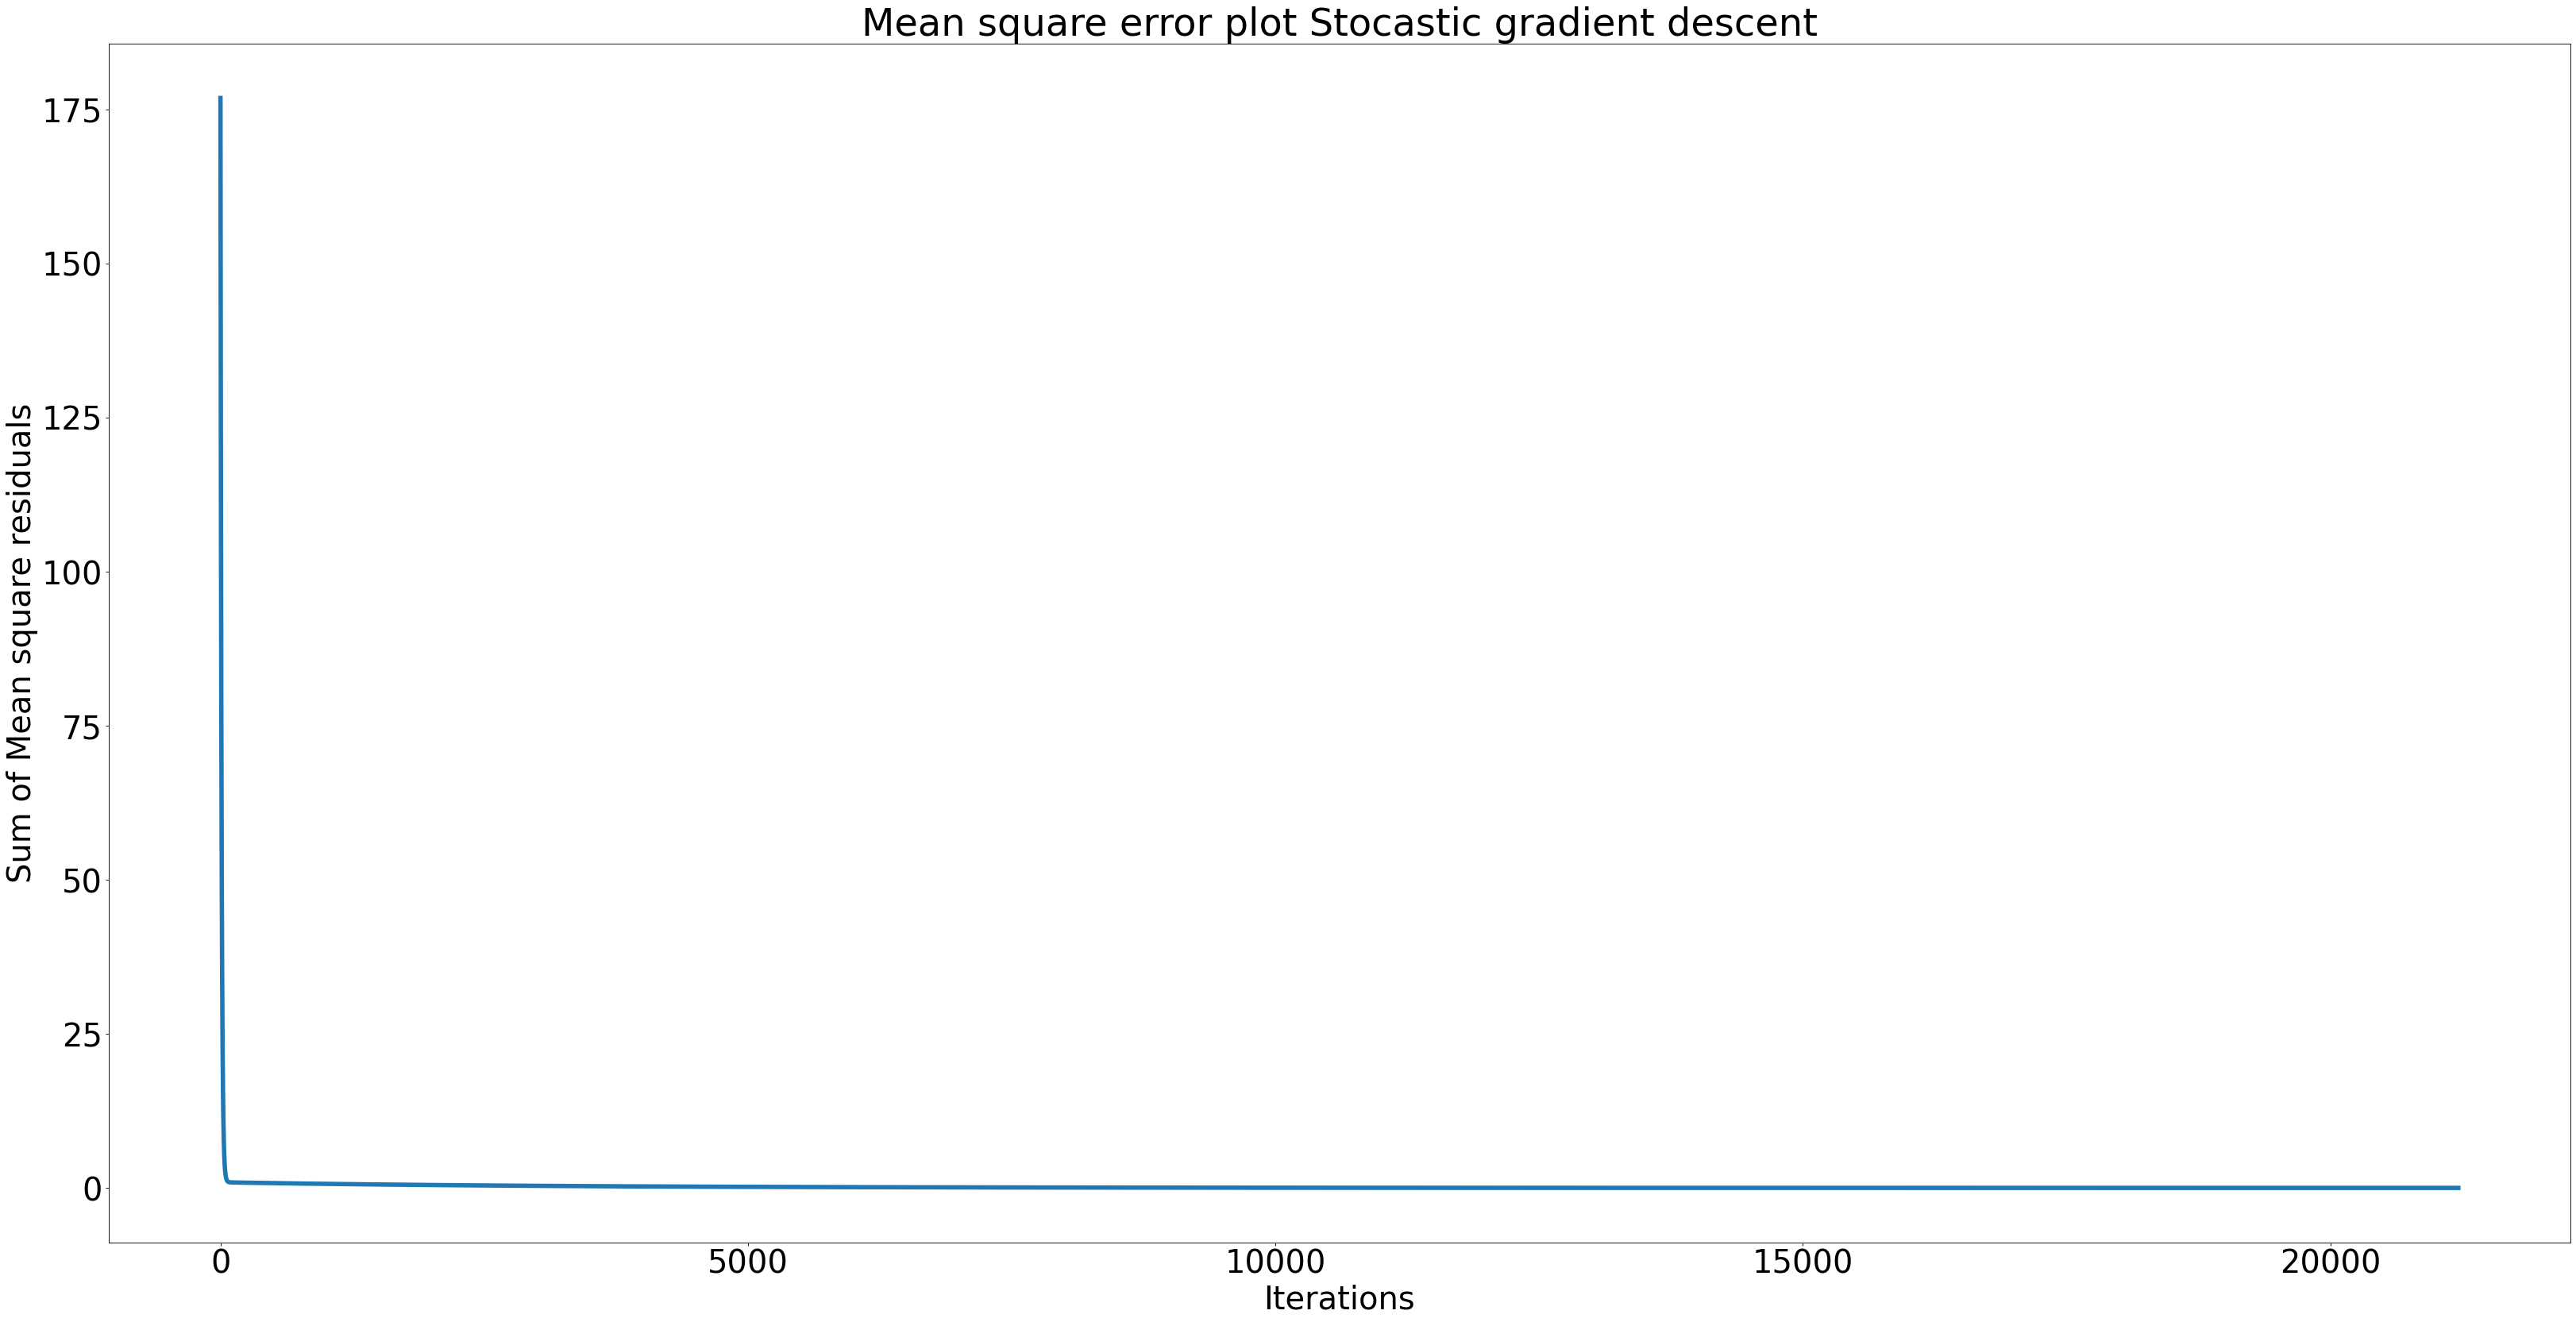

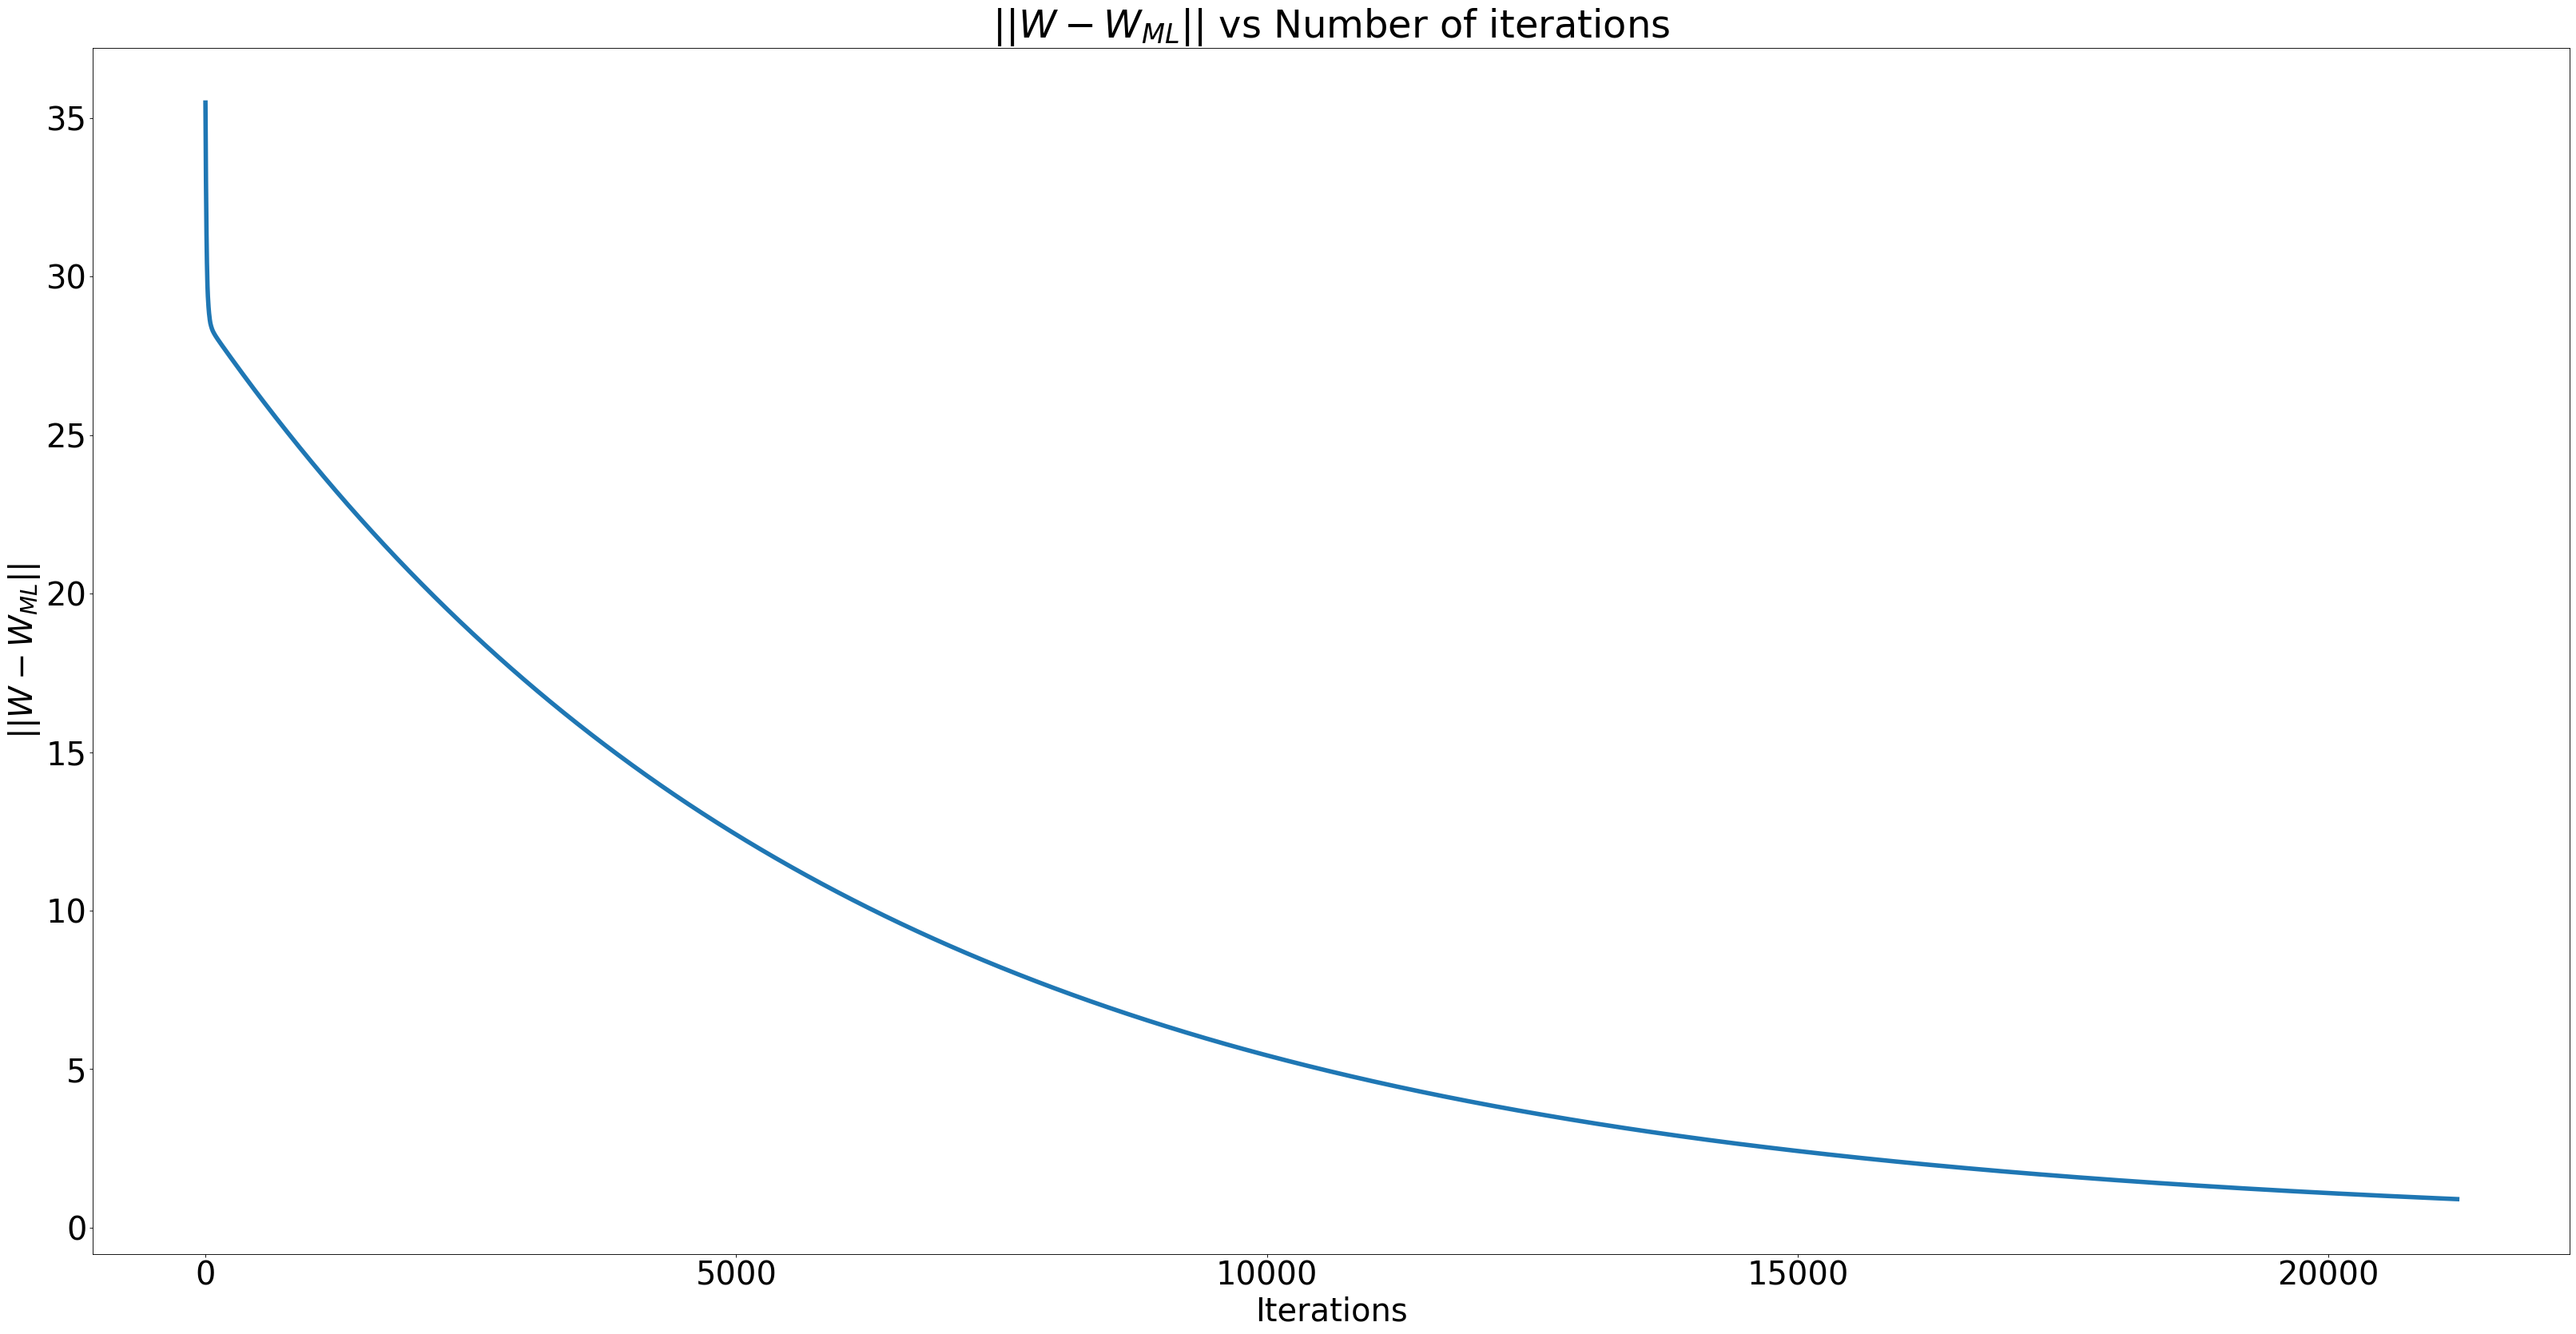

Mean square error converges to:  0.040644804955299305


In [17]:
print("Time taken by stocastic gradient descent to run ",count," iterations is ",end-start)
print("Number of iteration=",count)
plt.figure(figsize=(50,25),dpi=80)
plt.plot(error_store[12:],linewidth=5)
plt.title("Mean square error plot Stocastic gradient descent")
plt.xlabel("Iterations")
plt.ylabel("Sum of Mean square residuals")
plt.show()
plt.figure(figsize=(50,25),dpi=80)
plt.plot(er_wml_w[12:],linewidth=5)
plt.title("$||W-W_{ML}||$ vs Number of iterations")
plt.xlabel("Iterations")
plt.ylabel("$||W-W_{ML}||$")
plt.show()
print("Mean square error converges to: ",error_store[count-1])

In [18]:
Y_fit=np.matmul(X_test.T,W)
error=sum(sum((Y_test-Y_fit)**2)/Y_test.shape[0])
print(r"The mean square error on test data for W =",error)
#this means stocastic gradiest descent finds a better fit for the data? but is this right??

The mean square error on test data for W = 0.35841095840043635


<br><br>
QUESTION 2
<br><br><br>

Consider the same data-set as in Question (1). You are additionally given a data-set<br>
with 500 points for testing which you cannot use during train/cross-validation.
<br><br>
i. Code the gradient descent algorithm for ridge regression.

In [19]:
plt.rcParams.update({'font.size': 18})

In [20]:
def error_ridge(Y,W,X,lamda):
    '''Returns the mean square error between actual Y and predicted Y_fit'''
    er=np.matmul(X.T,W)
    er=sum(((Y-er)**2)/2)+sum((W**2)*0.5*lamda)
    return er/Y.shape[0]

def derivative_ridge(X,W,Y,lamda):
    '''Returns the calculated derivative value for ridge regression problems, 
    returns a matrix of size same as W'''
    XXt=np.matmul(X,X.T)
    xy=np.matmul(X,Y)
    return (np.matmul(XXt,W)-xy+W*lamda)

In [21]:
def run_ridge_regression(X,Y,lamda,tolerance=0.000005):
    '''
    X is input
    Y is lables
    lamda is hyperparameter which is fine-tuned using cross-validation set
    
    returns the weights learned for the ridge regression problem.
    '''
    W=np.random.rand(100,1)
    error_store=np.array([1e7])
    count=0
    verify=10
    i=0
    while(verify>tolerance):
        i=i+1
        step_size=0.0001/i
        W=W-step_size*derivative_ridge(X,W,Y,lamda)
        error_store=np.hstack((error_store,error_ridge(Y,W,X,lamda)))
        count=count+1
        verify=abs(error_store[count-1]-error_store[count])

    print("Number of iteration=",count)
    
    plt.plot(error_store[1:])
    plt.title("Mean square error plot")
    print("Mean square error converges to: ",error_store[count-1])
    return W

Number of iteration= 3411
Mean square error converges to:  0.12095913522316111


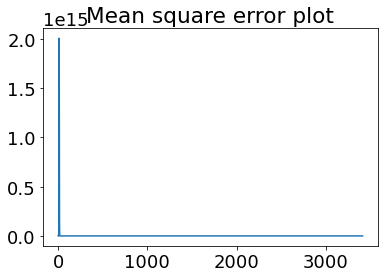

In [22]:
Weigths_rr=run_ridge_regression(X,Y,10)
#ridhe regression for lamda=10

In [23]:
Y_fit=np.matmul(X_test.T,Weigths_rr)
error=sum(sum((Y_test-Y_fit)**2)/Y_test.shape[0])
print(r"The mean square error on test data for W_ridge =",error)

The mean square error on test data for W_ridge = 0.3438845354790646


-----------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
ii. Cross-validate for various choices of λ and plot the error in the validation set as
a function of λ. For the best λ chosen, obtain $w_{R}$. Also obtain $w_{ML}$ for the
training data. Compare the test error of $w_R$ with $w_{ML}$. Which is better and
why?

<br>



In [24]:
def split_data(X,Y):
    s1 = np.random.choice(range(X.shape[1]), 8000, replace=False)
    s2 = list(set(range(X.shape[1])) - set(s1))
    return X[:,s1],Y[s1],X[:,s2],Y[s2]

In [25]:
cross_train,cross_train_lables,cross_test,cross_test_lables=split_data(X,Y)

Number of iteration= 464
Mean square error converges to:  0.1970117800047548
Number of iteration= 460
Mean square error converges to:  0.1896273565688562
Number of iteration= 462
Mean square error converges to:  0.1945871067013778
Number of iteration= 482
Mean square error converges to:  0.20514662231613445
Number of iteration= 564
Mean square error converges to:  0.23183549486106036
Number of iteration= 474
Mean square error converges to:  0.1998334136042303
Number of iteration= 513
Mean square error converges to:  0.2126874211292843
Number of iteration= 427
Mean square error converges to:  0.18221145793617655
Number of iteration= 492
Mean square error converges to:  0.20201635603541881
Number of iteration= 510
Mean square error converges to:  0.19275823225298802
Number of iteration= 618
Mean square error converges to:  0.20757366612514744
Number of iteration= 543
Mean square error converges to:  0.17247482060115552
Number of iteration= 264
Mean square error converges to:  0.154867261

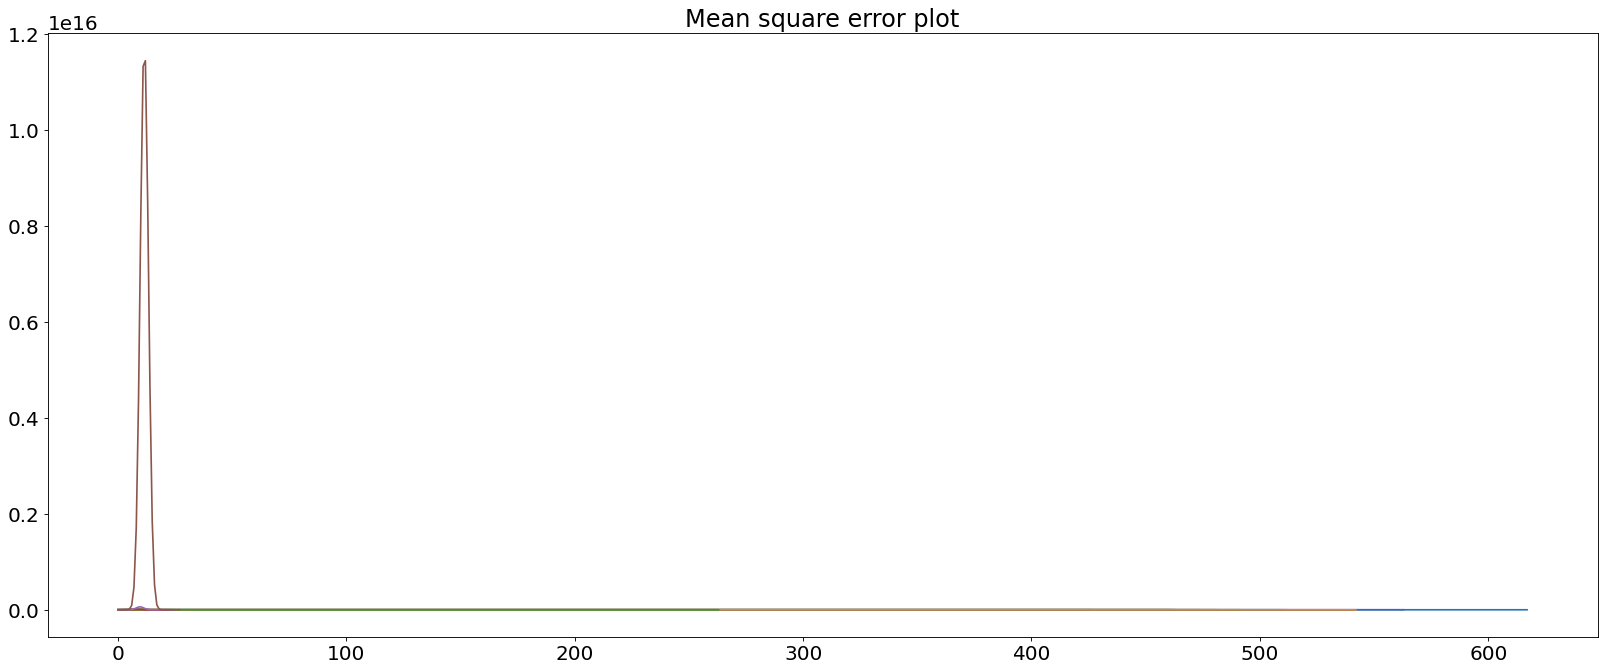

In [26]:
num_lamda_samples=15
lamda=np.linspace(0,num_lamda_samples-1,num_lamda_samples)
lamda=lamda-lamda[int(num_lamda_samples*0.2)]
lamda=np.exp(lamda)
lamda=np.hstack((np.zeros(1),lamda))
W_ML_rr=find_W_ML(cross_train,cross_train_lables)
store_errors=np.zeros(num_lamda_samples+1)
count=0
plt.figure(figsize=(25, 10), dpi=80)
for i in lamda:
    w=run_ridge_regression(cross_train,cross_train_lables,i,0.00005)
    Y_fit_new=np.matmul(cross_test.T,w)
    errors=sum((cross_test_lables-Y_fit_new)**2)/cross_test_lables.shape[0]
    store_errors[count]=errors
    count=count+1

plt.show()


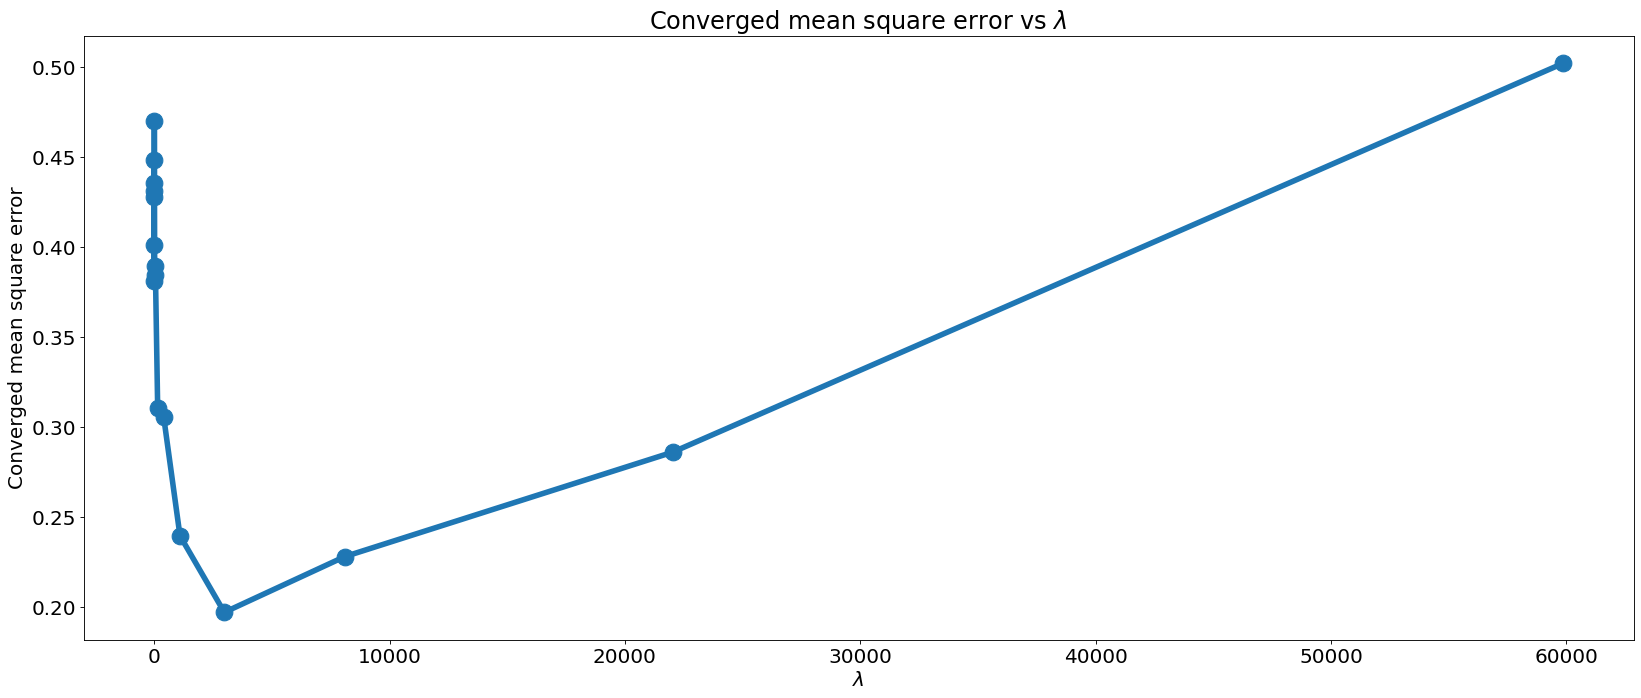

In [27]:
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(lamda,store_errors,'o-',linewidth=5,markersize=15)
plt.title("Converged mean square error vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("Converged mean square error")
plt.show()

In [28]:
print(lamda[1:])

[4.97870684e-02 1.35335283e-01 3.67879441e-01 1.00000000e+00
 2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04 5.98741417e+04]


In [29]:
store_errors

array([0.43543229, 0.38124893, 0.40110888, 0.43101773, 0.4484843 ,
       0.42743917, 0.46980852, 0.38948947, 0.38448188, 0.31075068,
       0.30565275, 0.23959563, 0.19709012, 0.22804951, 0.28600108,
       0.50198905])

In [30]:
l=lamda[np.argmin(store_errors)]
l,store_errors[np.argmin(store_errors)]

(2980.9579870417283, 0.19709012473704612)

Number of iteration= 329
Mean square error converges to:  0.19046124958253705
Number of iteration= 337
Mean square error converges to:  0.19287746330565395
Number of iteration= 356
Mean square error converges to:  0.19680092546688868
Number of iteration= 327
Mean square error converges to:  0.18741909778480884
Number of iteration= 340
Mean square error converges to:  0.1894862629061434
Number of iteration= 308
Mean square error converges to:  0.18062828291688016
Number of iteration= 331
Mean square error converges to:  0.18656863214993244
Number of iteration= 316
Mean square error converges to:  0.18147813130768062
Number of iteration= 333
Mean square error converges to:  0.18533883009661378
Number of iteration= 323
Mean square error converges to:  0.18322811684056983
Number of iteration= 329
Mean square error converges to:  0.18360602302379778
Number of iteration= 327
Mean square error converges to:  0.1825252648185068
Number of iteration= 294
Mean square error converges to:  0.174833

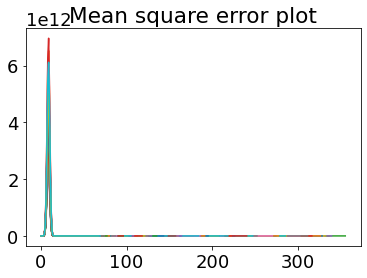

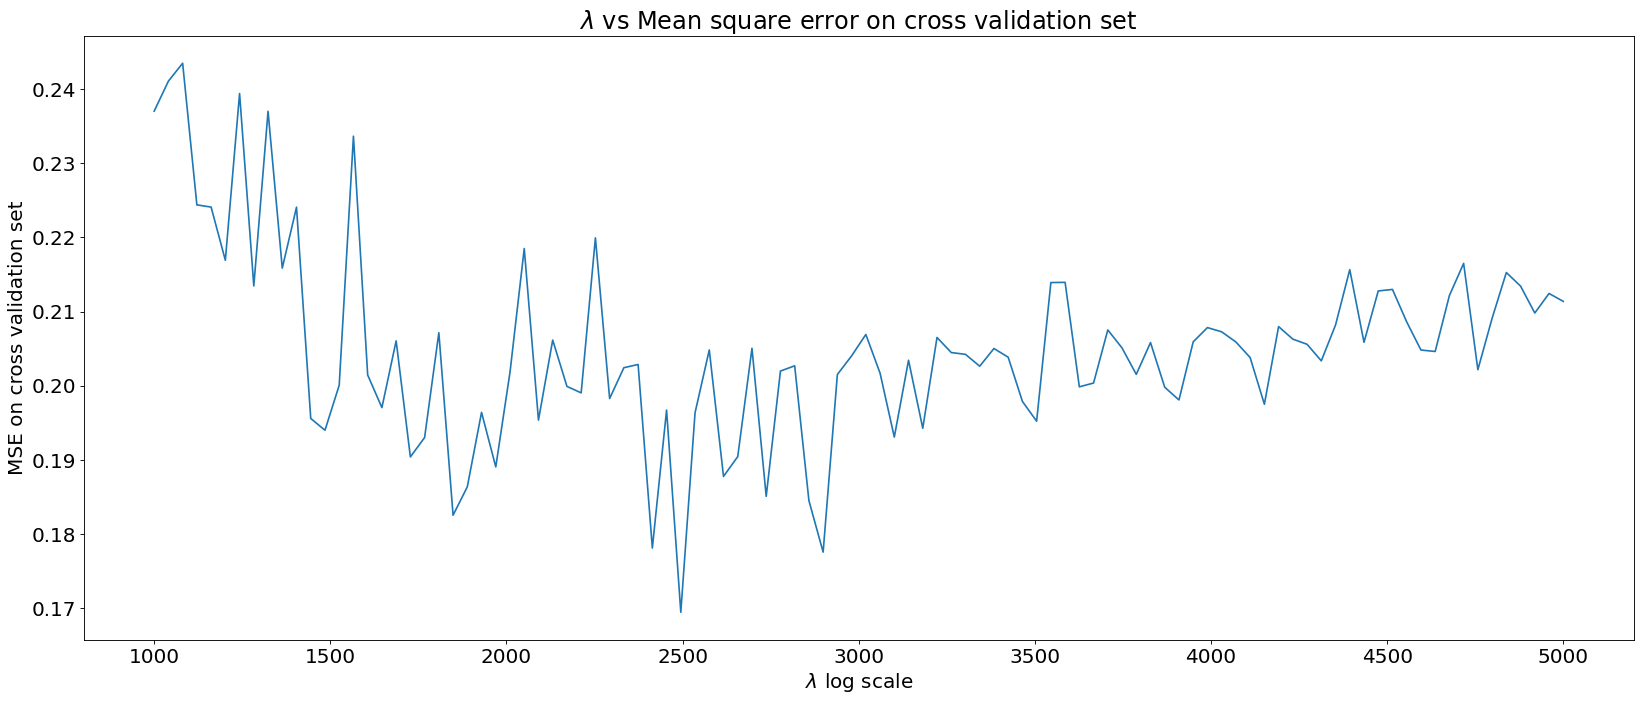

In [31]:
num_lamda_samples=100
lamda=np.linspace(1000,5000,num_lamda_samples)

W_ML_rr=find_W_ML(cross_train,cross_train_lables)
store_errors=np.zeros(num_lamda_samples)
count=0

for i in lamda:
    w=run_ridge_regression(cross_train,cross_train_lables,i,0.0001)
    Y_fit_new=np.matmul(cross_test.T,w)
    errors=sum((cross_test_lables-Y_fit_new)**2)/cross_test_lables.shape[0]
    store_errors[count]=errors
    count=count+1
plt.show()
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(lamda,store_errors)
plt.title("$\lambda$ vs Mean square error on cross validation set")
plt.xlabel('$\lambda$ log scale')
plt.ylabel('MSE on cross validation set')
plt.show()

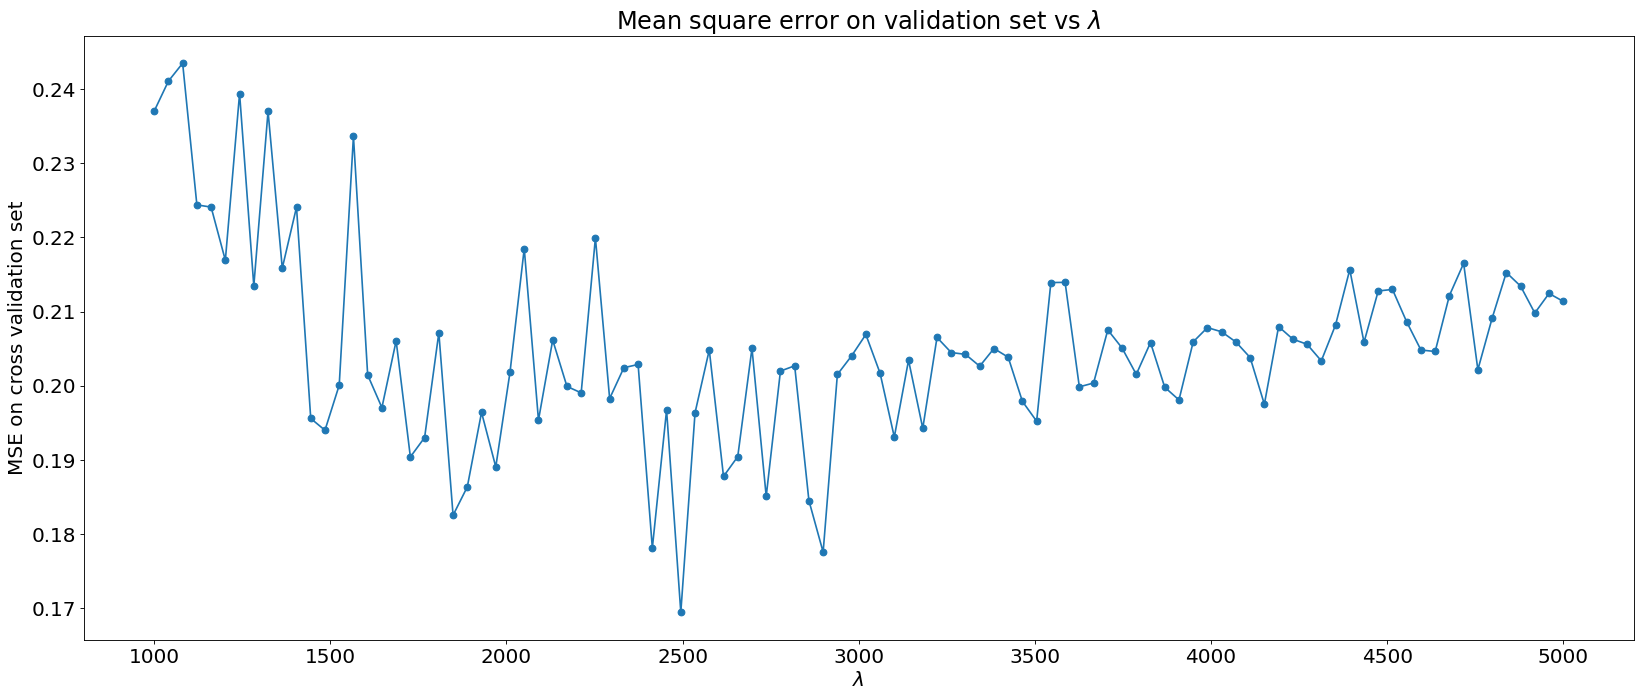

In [32]:
plt.figure(figsize=(25, 10), dpi=80)
plt.plot(lamda,store_errors,'o-')
plt.title("Mean square error on validation set vs $\lambda$")
plt.xlabel('$\lambda$')
plt.ylabel('MSE on cross validation set')
plt.show()

In [33]:
l=lamda[np.argmin(store_errors)]
l,store_errors[np.argmin(store_errors)]

(2494.9494949494947, 0.16946529741456845)

Number of iteration= 1006
Mean square error converges to:  0.12686181593010143


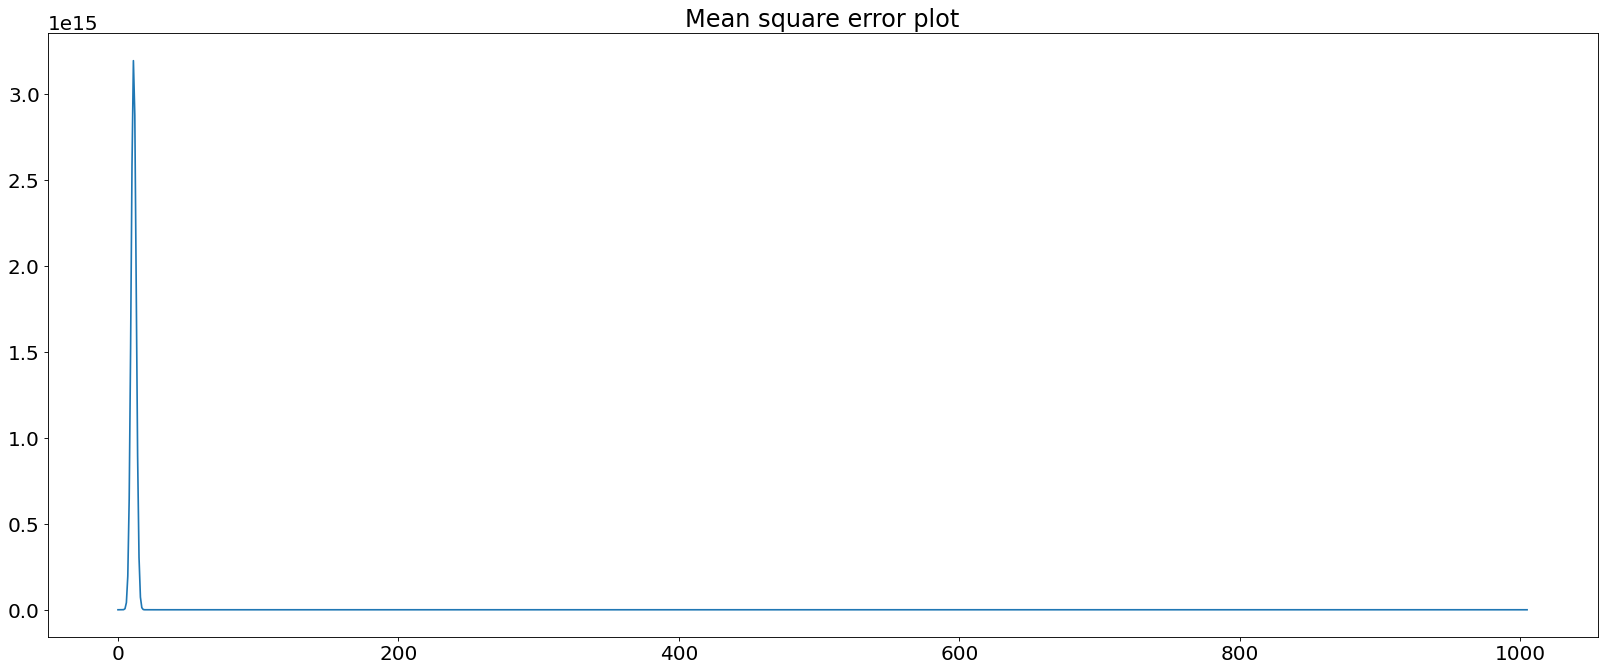

In [34]:
plt.figure(figsize=(25, 10), dpi=80)
w=run_ridge_regression(X,Y,l)
plt.show()

In [35]:
Y_fit=np.matmul(X_test.T,w)
error=sum(sum((Y_test-Y_fit)**2)/Y_test.shape[0])
print(r"The mean square error on test data for W =",error)

The mean square error on test data for W = 0.21967961048537496


In [36]:
#calculating the mean square error on test data using W_ML weights trained from training data.

Y_fit=np.matmul(X_test.T,W_ML)
error=sum(sum((Y_test-Y_fit)**2)/Y_test.shape[0])
print(r"The mean square error on test data for W_ML =",error)

The mean square error on test data for W_ML = 0.37072731116978697
